# Image Classification using Fashion MNIST
## Purpose
<a href="https://colab.research.google.com/github/dhamacher/tensorflow-models/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Tensorflow's Keras API to build an image classifaction model using the Sequential API. This is a multi-class classification problem consisting of 10 output classes. 

In [1]:
import tensorflow as tf
print(f'TensorFlow Version: {tf.__version__}')

TensorFlow Version: 2.5.0


### Load the Dataset (Fashion MNIST)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The feature space consists of 60k image samples with 28X28 pixels in size.

In [28]:
X_train_full.shape

(60000, 28, 28)

Below shows a sample

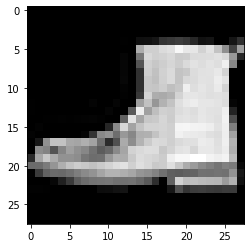

In [29]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Create Validation Set

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
class_names[y_train[0]]

'Coat'

### Create the model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Compile the Model



In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Training and Evaluating the Model



In [12]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=30)

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7008 - accuracy: 0.7668 - val_loss: 0.5056 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4847 - accuracy: 0.8313 - val_loss: 0.4716 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4404 - accuracy: 0.8458 - val_loss: 0.4109 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4142 - accuracy: 0.8550 - val_loss: 0.3920 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3931 - accuracy: 0.8631 - val_loss: 0.3918 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8671 - val_loss: 0.4024 - val_accuracy: 0.8574
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3622 - accuracy: 0.8723 - val_loss: 0.3537 - val_accuracy:

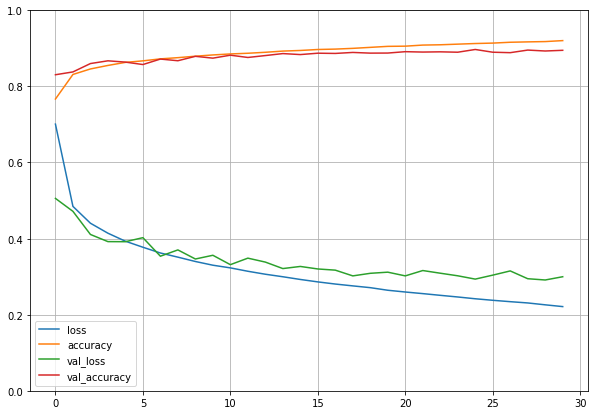

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Evaluate

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 66.0535 - accuracy: 0.8472


[66.05347442626953, 0.8471999764442444]

#### Make Predictions

In [18]:
X_new = X_test[:10]
y_hat = model.predict(X_new)
y_hat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. 
Please use instead:
* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).
* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '

In [27]:
X_new = X_test[:10]
y = y_test[:10]
# y_hat = model.predict_classes(X_new)
y_hat = np.argmax(model.predict(X_new), axis=-1)

data = {'predicted_values': np.array(class_names)[y_hat],
       'actual_values': np.array(class_names)[y] }

df = pd.DataFrame(data)
df.head()

,predicted_values,actual_values
0,Ankle Boot,Ankle Boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
